In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('pervoskite')
model_names

['xu_1999_pv']

# Exploring Pyrrhenious's Pervoskite Models Database Correspondence

Here we look at the pervoskite models parameterization correspondence of:

 * Xu S. and Shankland Thomas J., 1999. Electrical conductivity of orthopyroxene and its high pressure phases

Only one model is currently represented by the database.
 
## Xu and Shankland 1999
 

xu_1999_pv
pervoskite


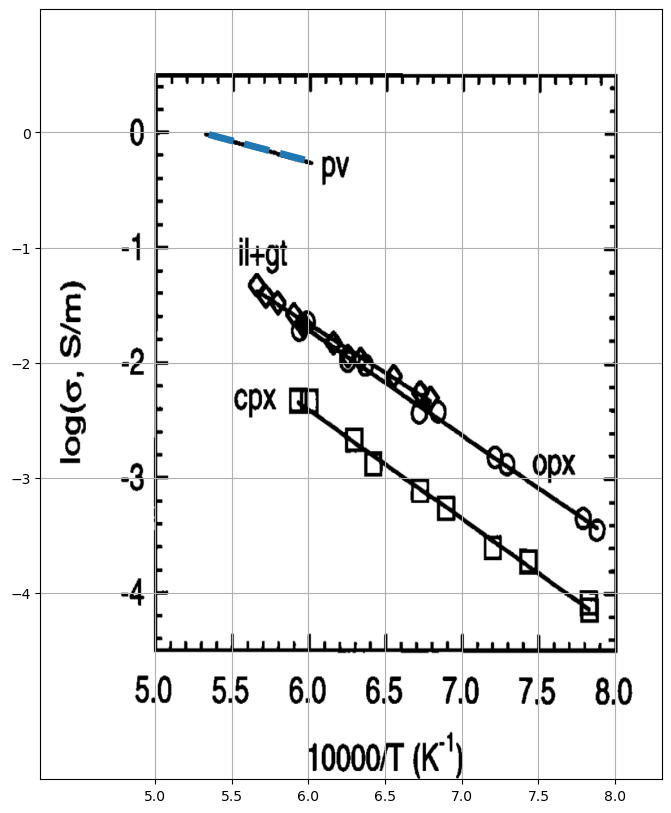

In [3]:
index = 0
model = model_names[index]
print(model)
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    conductivity4 = model.get_conductivity(T=temperature_range)
    ax.plot(1e4/temperature_range,np.log10(conductivity4),linestyle='--',linewidth=5)